# Dataset Balancing using pandas

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
path = "./dataJoe/"

In [ ]:
# Don't run this line and the next 3 ya hamo w ya adham
df =pd.read_csv(path+'dataset.csv')
classG = df[df['class'] == 'g']
classH = df[df['class'] == 'h']
countG, countH = df['class'].value_counts()

In [ ]:
classGUnder = classG.sample(countH)

In [ ]:
newDataset = pd.concat([classGUnder, classH])

In [ ]:
df.to_csv(path+'balanced_dataset.csv',index=True)

# Reading Data without recreating it each time

In [37]:
newDataset = pd.read_csv(path+'balanced_dataset.csv')

# Data Split

In [ ]:
traindf, testdf = train_test_split(newDataset, test_size=0.3,random_state=42,shuffle=True)

In [ ]:
traindf.to_csv(path+'train_dataset.csv',index=True)
testdf.to_csv(path+'test_dataset.csv',index=True)
x= newDataset.drop('class',axis=1) # 1 for column, 0 for index
y= newDataset['class']
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.3,random_state=42,shuffle=True)

# Importing the models

In [26]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

# Decision Tree

In [ ]:
model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=model.classes_).plot()
plt.show()

In [ ]:
tree.plot_tree(model)
plt.show()

# AdaBoost

# KNN

In [28]:
greatestScore = 0
greatestK = 0
for k in range(1,100):
    model = KNeighborsClassifier(n_neighbors=k)
    # scores = cross_validate(model, x_train, y_train, cv=10,scoring='accuracy')
    # score = scores['test_score'].mean()
    scores = cross_val_score(model, x_train, y_train, cv=10)
    score = scores.mean()
    if score > greatestScore:
        greatestScore = score
        greatestK = k


In [29]:
greatestK

37

In [34]:
model = KNeighborsClassifier(n_neighbors=37)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           g       0.72      0.85      0.78      2024
           h       0.81      0.66      0.73      1989

    accuracy                           0.76      4013
   macro avg       0.77      0.76      0.75      4013
weighted avg       0.77      0.76      0.75      4013



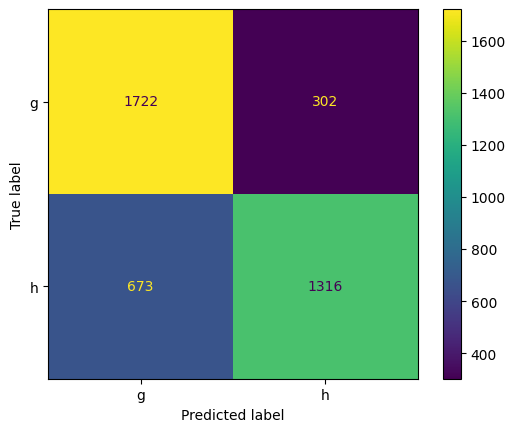

In [36]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=model.classes_).plot()
plt.show()

# Random Forest

# Naive Bayes

In [ ]:
model = GaussianNB()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=model.classes_).plot()
plt.show()